# GDP, electric power consumptions, and CO2 emissions 

# in the North American countries

### - World bank indicators dataset

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

### load indicators.csv file from the local directory

In [2]:
df_wb = pd.read_csv("./dataset/Indicators.csv") #, na_values=['', 'N/A', '?', '-'])

### look inside the dataframe

In [3]:
print("Number of rows: {} \nNumber of columns: {}".format(df_wb.shape[0], df_wb.shape[1]))
print()
indicator_lists = df_wb.IndicatorName.unique().tolist()
print("Total number of indicators: {}".format(len(indicator_lists)))
print()
print(df_wb.head(3))

Number of rows: 5656458 
Number of columns: 6

Total number of indicators: 1344

  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   

    IndicatorCode  Year       Value  
0     SP.ADO.TFRT  1960  133.560907  
1     SP.POP.DPND  1960   87.797601  
2  SP.POP.DPND.OL  1960    6.634579  


### Separate out the North American countries

In [4]:
north_america_countries = ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",\
"Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala" , "Haiti", "Honduras", "Jamaica",\
"Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", \
"Trinidad and Tobago", "United States"]

In [5]:
df_nrth_amrca = df_wb[df_wb["CountryName"].isin(north_america_countries)]

print(df_nrth_amrca.shape)
print("\n Countries in the North America:")
print(df_nrth_amrca.CountryName.unique())

(538369, 6)

 Countries in the North America:
['Antigua and Barbuda' 'Barbados' 'Belize' 'Canada' 'Costa Rica' 'Cuba'
 'Dominica' 'Dominican Republic' 'El Salvador' 'Grenada' 'Guatemala'
 'Haiti' 'Honduras' 'Jamaica' 'Mexico' 'Nicaragua' 'Panama'
 'Trinidad and Tobago' 'United States']


### Three indicators of these countries are analyzed:

* **GDP per capita (USD)**

* **Electric power consumption (kWh per capita)**

* **CO2 emission per capita**


In [6]:
df_nrth_am_GDP = df_nrth_amrca[df_nrth_amrca.IndicatorName =='GDP per capita (current US$)']
df_nrth_am_power = df_nrth_amrca[df_nrth_amrca.IndicatorName =='Electric power consumption (kWh per capita)']
df_nrth_am_CO2 = df_nrth_amrca[df_nrth_amrca.IndicatorName =='CO2 emissions (metric tons per capita)']

In [7]:
print("Shape of GDP dataframe: {}".format(df_nrth_am_GDP.shape))
print("Shape of power dataframe: {}".format(df_nrth_am_power.shape))
print("Shape of CO2 dataframe: {}".format(df_nrth_am_CO2.shape))

Shape of GDP dataframe: (927, 6)
Shape of power dataframe: (610, 6)
Shape of CO2 dataframe: (988, 6)


In [8]:
import seaborn as sb

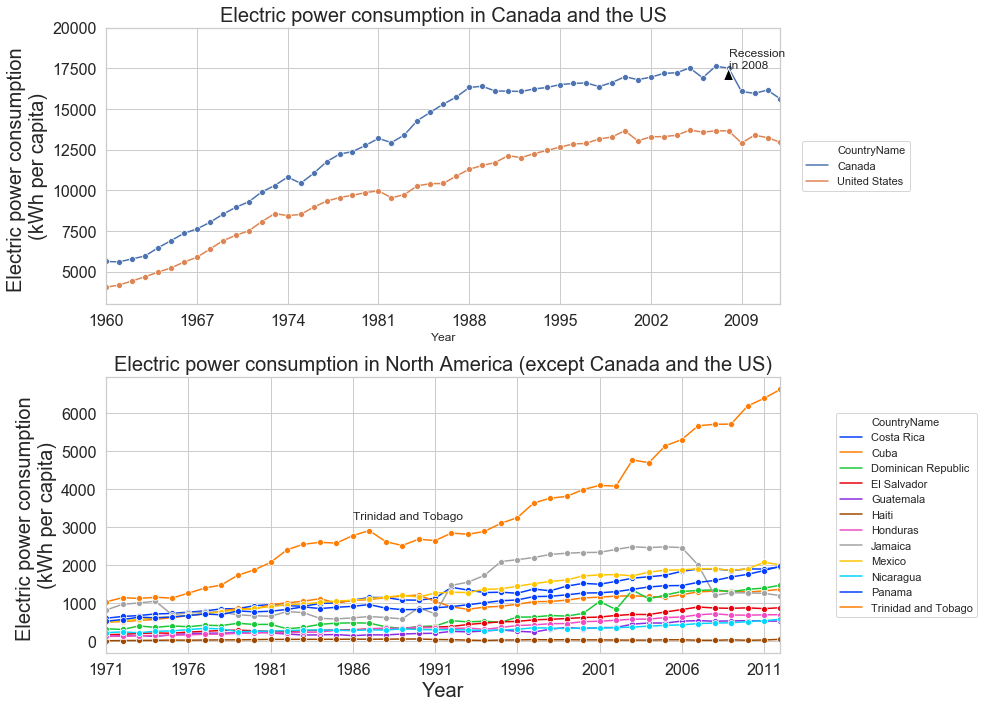

In [9]:
sb.set(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
g1 = sb.lineplot(x="Year", y="Value", hue="CountryName", \
                data=\
                 df_nrth_am_power\
                 [df_nrth_am_power.CountryName.isin(["Canada", "United States"])],\
               ax = ax[0], marker="o")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
g1.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
ax[0].set_xlim([1960, 2012])
ax[0].set_ylim([3000, 20000])
ax[0].tick_params(labelsize=16)
ax[0].set_xticks(ticks=np.arange(1960, 2012, 7))
ax[0].set_title("Electric power consumption in Canada and the US", fontsize=20)
# ax[0].set_xlabel("Year", fontsize=16)
ax[0].set_ylabel("Electric power consumption \n(kWh per capita)", fontsize=20)
ax[0].annotate(s = "Recession \nin 2008", xy = (2008,17500), \
             arrowprops=dict(facecolor="black", shrink=0.05, headwidth=10,width=4))


g2 = sb.lineplot(x="Year", y="Value", hue="CountryName", \
                data=df_nrth_am_power[df_nrth_am_power.CountryName.isin(["Canada", "United States"])==False],\
               ax = ax[1], palette = sb.color_palette("bright", 12), sort=False, marker="o") # palette = sb.hls_palette(12, l=0.3, s=0.8) )


box = g2.get_position()
g2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
g2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
ax[1].set_xlim([1971, 2012])
ax[1].set_xticks(ticks=np.arange(1971, 2012, 5))


ax[1].set_xlabel("Year", fontsize=20)
ax[1].set_ylabel("Electric power consumption \n(kWh per capita)", fontsize=20)
ax[1].tick_params(labelsize=16)
ax[1].set_title("Electric power consumption in North America (except Canada and the US)", fontsize=20)
ax[1].annotate(s = "Trinidad and Tobago", xy = (1986,3200))

# ax[1].set_xticklabels(fontsize=15)
fig.tight_layout()
plt.show()
# plt.show()

In [10]:
df_nrth_am_GDP.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5053,Belize,BLZ,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,304.910281
6508,Canada,CAN,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,2294.568814
7833,Costa Rica,CRI,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,380.720647
8581,Dominican Republic,DOM,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,204.126211
10545,Guatemala,GTM,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,252.837309


In [11]:
df_nrth_am_GDP.shape

(927, 6)

In [12]:
df_nrth_am_GDP.CountryName.unique()

array(['Belize', 'Canada', 'Costa Rica', 'Dominican Republic',
       'Guatemala', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
       'Panama', 'Trinidad and Tobago', 'United States', 'El Salvador',
       'Cuba', 'Antigua and Barbuda', 'Dominica', 'Grenada', 'Barbados',
       'Haiti'], dtype=object)

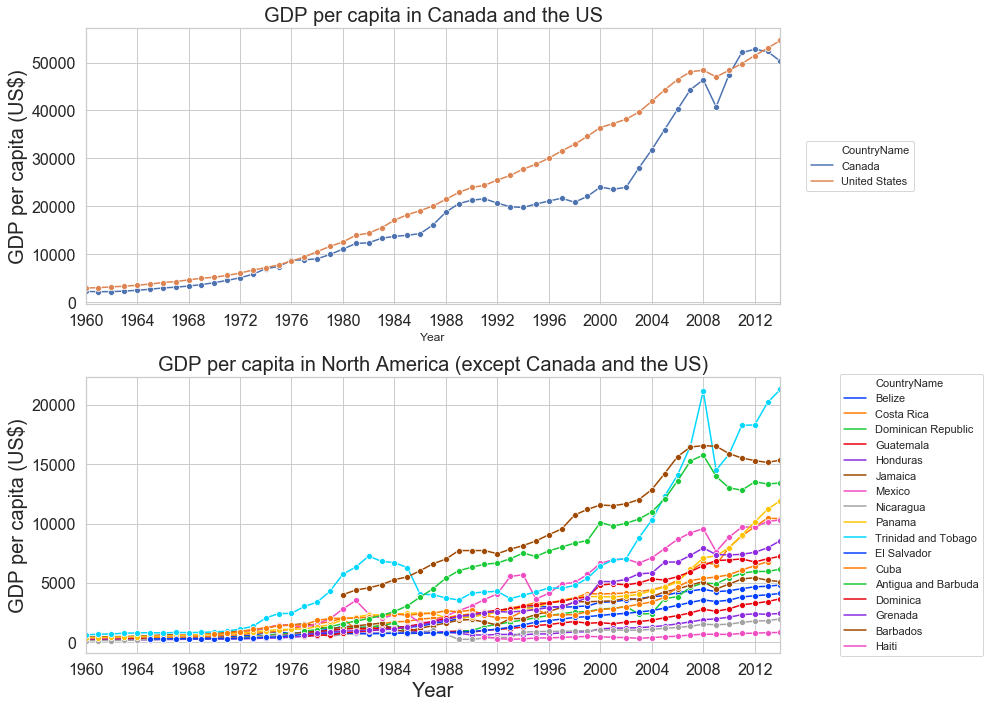

In [13]:
sb.set(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
g1 = sb.lineplot(x="Year", y="Value", hue="CountryName", \
                data=\
                 df_nrth_am_GDP\
                 [df_nrth_am_GDP.CountryName.isin(["Canada", "United States"])],\
               ax = ax[0], marker="o")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
g1.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
ax[0].set_xlim([1960, 2014])
# ax[0].set_ylim([3000, 20000])
ax[0].tick_params(labelsize=16)
ax[0].set_xticks(ticks=np.arange(1960, 2014, 4))
ax[0].set_title("GDP per capita in Canada and the US", fontsize=20)
# ax[0].set_xlabel("Year", fontsize=16)
ax[0].set_ylabel("GDP per capita (US$)", fontsize=20)
# ax[0].annotate(s = "Recession \nin 2008", xy = (2008,17500), \
#              arrowprops=dict(facecolor="black", shrink=0.05, headwidth=10,width=4))



g2 = sb.lineplot(x="Year", y="Value", hue="CountryName", \
                data=df_nrth_am_GDP[df_nrth_am_GDP.CountryName.isin(["Canada", "United States"])==False],\
               ax = ax[1], palette = sb.color_palette("bright", 17), sort=False, marker="o") # palette = sb.hls_palette(12, l=0.3, s=0.8) )

box = g2.get_position()
g2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
g2.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
ax[1].set_xlim([1960, 2014])
ax[1].set_xticks(ticks=np.arange(1960, 2014, 4))
ax[1].set_xlabel("Year", fontsize=20)
ax[1].set_ylabel("GDP per capita (US$)", fontsize=20)
ax[1].tick_params(labelsize=16)
ax[1].set_title("GDP per capita in North America (except Canada and the US)", fontsize=20)
# ax[1].annotate(s = "Trinidad and Tobago", xy = (1986,3200))

# ax[1].set_xticklabels(fontsize=15)
fig.tight_layout()
plt.show()


### Merging electricty consumption and GDP per capita

In [14]:
df_nrth_am_GDP.rename(columns = {"Value":"GDP"}, inplace=True)

C:\Users\elias\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [15]:
# df_nrth_am_GDP.head(3)

In [16]:
df_nrth_am_GDP.reset_index(drop=True, inplace=True)

In [17]:
df_nrth_am_GDP.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,GDP
0,Belize,BLZ,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,304.910281
1,Canada,CAN,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,2294.568814
2,Costa Rica,CRI,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,380.720647


In [18]:
df_GDP = pd.DataFrame(df_nrth_am_GDP.groupby(["CountryName", "Year"])["GDP"].mean())


In [19]:
df_GDP.head(2)

GDP
CountryName         Year             
Antigua and Barbuda 1977   941.919930
                    1978  1061.660439

In [20]:
df_GDP.reset_index(level=["CountryName", "Year"]).head(3)

,CountryName,Year,GDP
0,Antigua and Barbuda,1977,941.919930
1,Antigua and Barbuda,1978,1061.660439
2,Antigua and Barbuda,1979,1307.396413


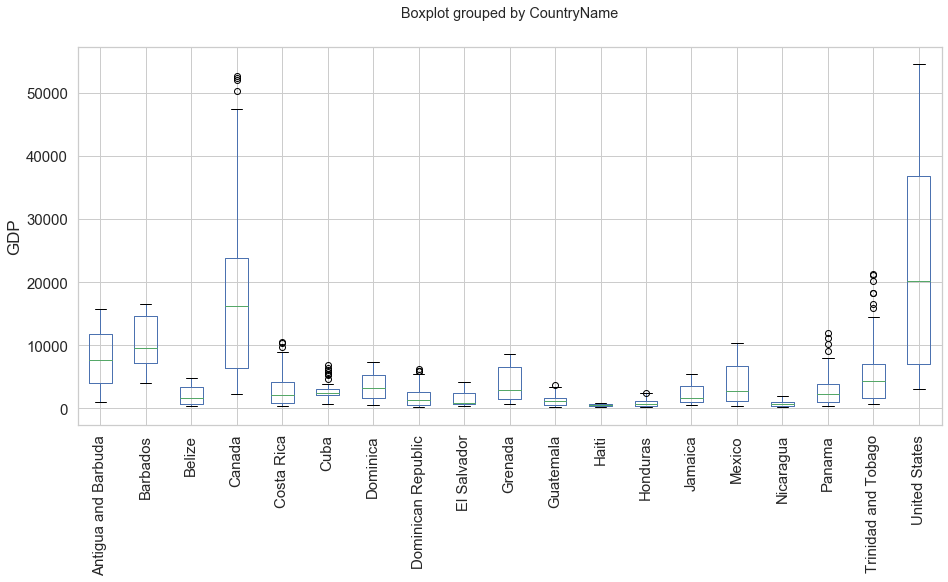

In [21]:
df_GDP.boxplot(by="CountryName",figsize=(15,7), rot=90, fontsize=15)
plt.xlabel("")
plt.ylabel("GDP", fontsize=17)
plt.title("")
plt.show()

In [22]:
df_GDP.index.levels[0]

Index(['Antigua and Barbuda', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
       'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada',
       'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
       'Panama', 'Trinidad and Tobago', 'United States'],
      dtype='object', name='CountryName')

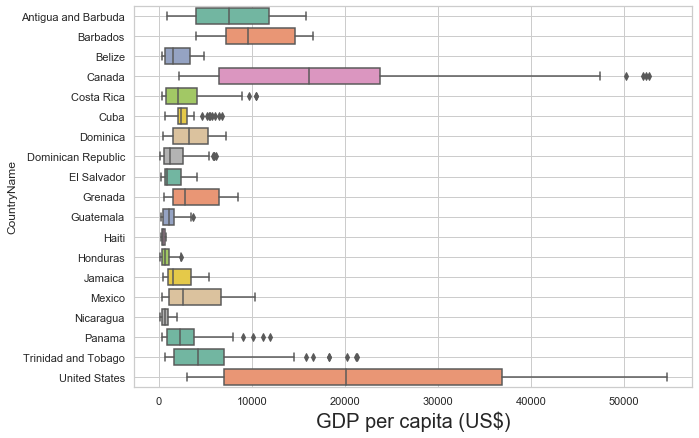

In [23]:
fig, ax1 = plt.subplots(figsize=(10,7))
sb_gdp_dist = sb.boxplot(data=df_GDP.reset_index(level=["CountryName", "Year"]), y="CountryName", x="GDP", \
           palette=sb.color_palette("Set2", 17), ax=ax1)
plt.xlabel("GDP per capita (US$)", fontsize=20)
plt.grid(True)
sb_gdp_dist.figure.savefig("GDP_distribution.png")
plt.show()


In [24]:
df_nrth_am_power.rename(columns={"Value":"Power consumption"}, inplace=True)
df_nrth_am_power.reset_index(drop=True, inplace=True)

C:\Users\elias\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [25]:
# df_nrth_am_electric_consumption.head()

In [26]:
df_power = pd.DataFrame(df_nrth_am_power.groupby(["CountryName", "Year"])["Power consumption"].mean())

In [27]:
df_power.head(3)

Power consumption
CountryName Year                   
Canada      1960        5630.629813
            1961        5605.111926
            1962        5791.124960

### join df_power and df_GDP

In [28]:
df_power_GDP = df_power.join(other=df_GDP, how="inner")

In [29]:
df_power_GDP.head()

Power consumption          GDP
CountryName Year                                
Canada      1960        5630.629813  2294.568814
            1961        5605.111926  2231.293824
            1962        5791.124960  2255.230044
            1963        5966.040920  2354.839122
            1964        6468.926261  2529.518179

In [30]:
df_power_GDP.tail()

Power consumption           GDP
CountryName   Year                                 
United States 2008       13663.424680  48401.427340
              2009       12913.711429  47001.555350
              2010       13394.014607  48374.056457
              2011       13240.357987  49781.357490
              2012       12954.153262  51456.658728

In [31]:
df_power_GDP_new = df_power_GDP.reset_index(level=["CountryName", "Year"])


In [32]:
df_power_GDP_new.head()

,CountryName,Year,Power consumption,GDP
0,Canada,1960,5630.629813,2294.568814
1,Canada,1961,5605.111926,2231.293824
2,Canada,1962,5791.124960,2255.230044
3,Canada,1963,5966.040920,2354.839122
4,Canada,1964,6468.926261,2529.518179


In [33]:
df_power_GDP_new.CountryName.nunique()

14

In [34]:
df_power_GDP_new_1 = df_power_GDP_new[df_power_GDP_new["CountryName"].isin(["Canada", "United States", \
                                "Trinidad and Tobago", "Dominican Republic", "Cuba", "Jamaica", "Costarica", "Mexico"])]

In [35]:
df_power_GDP_new_1.CountryName.unique()

array(['Canada', 'Cuba', 'Dominican Republic', 'Jamaica', 'Mexico',
       'Trinidad and Tobago', 'United States'], dtype=object)

In [36]:
# df_power_GDP_new_2 = df_power_GDP_new[df_power_GDP_new["CountryName"].isin(["Canada", "United States", \
#                                 "Trinidad and Tobago", "Dominican Republic", "Cuba", "Jamaica"])==False]

In [37]:
# df_power_GDP_new_2.CountryName.unique()

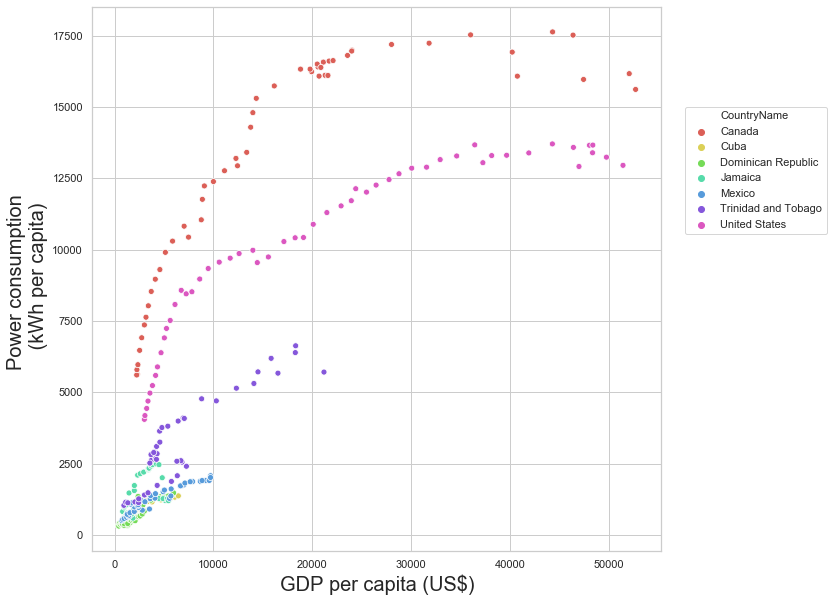

In [38]:
sb.set(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

g11 = sb.scatterplot(x="GDP", y="Power consumption", hue="CountryName", data=df_power_GDP_new_1,\
               palette=sb.hls_palette(7, l=0.6), alpha=1, marker="o") #, ax=ax[0])
plt.xlabel("GDP per capita (US$)", fontsize = 20)
plt.ylabel("Power consumption \n (kWh per capita)", fontsize=20)
box = g11.get_position()
g11.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
g11.legend(loc='center right', bbox_to_anchor=(1.3, 0.7), ncol=1)

# g21 = sb.scatterplot(x="GDP", y="Power consumption", hue="CountryName", data=df_power_GDP_new_2,\
#                palette=sb.color_palette("Set1", 7), alpha=1, ax=ax[1])

# box = g21.get_position()
# g21.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# g21.legend(loc='center right', bbox_to_anchor=(1.3, 0.7), ncol=1)
g11.figure.savefig("Scatter_plot_GDP_power.png")
plt.show()

### df_nrth_am_CO2

In [39]:
df_nrth_am_CO2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3927,Antigua and Barbuda,ATG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.670617
4812,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.746313
5033,Belize,BLZ,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.477951
6457,Canada,CAN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,10.770847
7795,Costa Rica,CRI,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.368614


In [40]:
df_nrth_am_CO2.rename(columns={'Value':'CO2'}, inplace=True)

In [41]:
df_CO2 = pd.DataFrame(df_nrth_am_CO2.groupby(["CountryName", "Year"])["CO2"].mean())

In [42]:
# df_CO2.head(3)

In [43]:
# df_CO2 = df_CO2.reset_index(level=["CountryName", "Year"])

In [44]:
df_CO2.head(3)

CO2
CountryName         Year          
Antigua and Barbuda 1960  0.670617
                    1961  0.860441
                    1962  1.823374

### make a dataframe having GDP, power consumption, and CO2 emissions

In [45]:
df_power_GDP.head()

Power consumption          GDP
CountryName Year                                
Canada      1960        5630.629813  2294.568814
            1961        5605.111926  2231.293824
            1962        5791.124960  2255.230044
            1963        5966.040920  2354.839122
            1964        6468.926261  2529.518179

In [46]:
df_GDP_power_CO2 = df_power_GDP.join(other= df_CO2, how="inner")

In [47]:
df_GDP_power_CO2.head(3)

Power consumption          GDP        CO2
CountryName Year                                           
Canada      1960        5630.629813  2294.568814  10.770847
            1961        5605.111926  2231.293824  10.627898
            1962        5791.124960  2255.230044  11.130627

In [48]:
df_GDP_power_CO2.reset_index(level=["CountryName", "Year"], inplace=True)

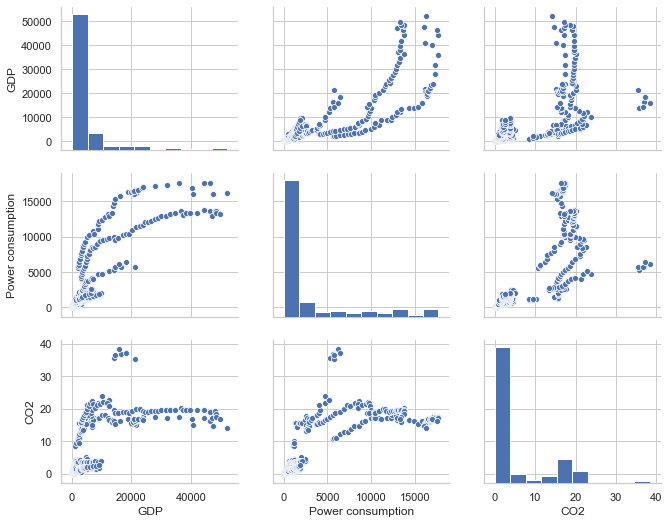

In [49]:
sb.pairplot(data= df_GDP_power_CO2[["CountryName", "GDP", "Power consumption", "CO2"]],aspect=1.25, palette=sb.hls_palette(14,l=0.5))
plt.show()

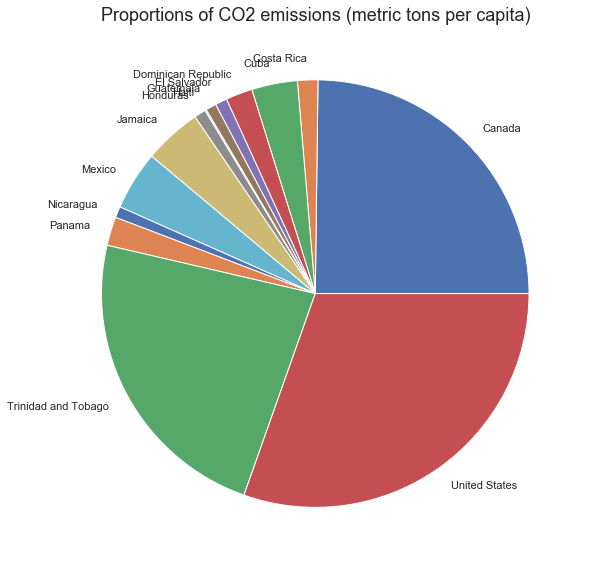

In [50]:
%matplotlib inline
plt.figure(figsize=(15,8))
df_GDP_power_CO2[['CountryName', 'CO2']].groupby("CountryName")["CO2"].sum().plot.pie()
plt.ylabel("")
plt.title("Proportions of CO2 emissions (metric tons per capita)" , fontsize=18)
plt.tight_layout()
plt.show()


In [51]:
df_power_GDP_CO2_1 = df_GDP_power_CO2[df_GDP_power_CO2["CountryName"].isin(["Canada", "United States", \
                                "Trinidad and Tobago",  "Mexico"])]

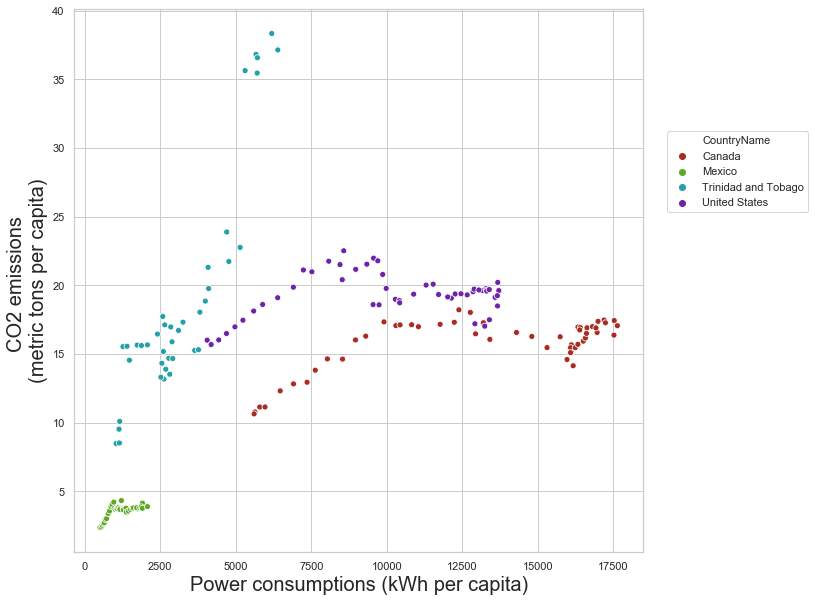

In [52]:
sb.set(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

g11 = sb.scatterplot(x="Power consumption", y="CO2", hue="CountryName", data=df_power_GDP_CO2_1,\
               palette=sb.hls_palette(4, l=0.4), alpha=1, marker="o") #, ax=ax[0])
plt.xlabel("Power consumptions (kWh per capita)", fontsize = 20)
plt.ylabel("CO2 emissions \n(metric tons per capita)", fontsize=20)
box = g11.get_position()
g11.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
g11.legend(loc='center right', bbox_to_anchor=(1.3, 0.7), ncol=1)
plt.show()


C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


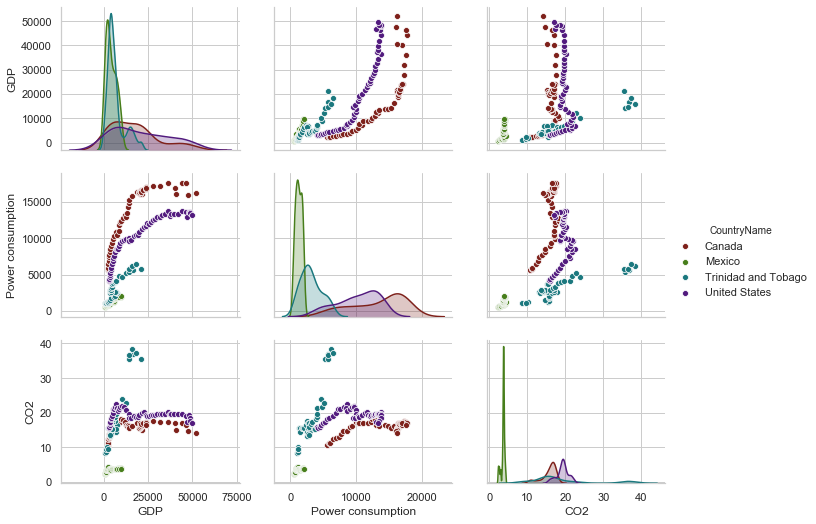

In [53]:
sb.pairplot(data=df_power_GDP_CO2_1[["CountryName", "GDP","Power consumption", "CO2"]], hue="CountryName",\
            palette=sb.hls_palette(4,l=0.3), aspect=1.25)
plt.show()